# Source

This notebook was modified from the following sources.

- "Step-by-Step R-CNN Implementation From Scratch In Python," by Rohit Thakur. Available at: https://towardsdatascience.com/step-by-step-r-cnn-implementation-from-scratch-in-python-e97101ccde55. Last accessed: Nov. 9, 2022.
- GitHub repository: https://github.com/1297rohit/RCNN (las accessed: Nov. 9, 2022).

Clone date from GitHub into `/content`.

In [1]:
%cd /content
!git clone https://github.com/1297rohit/RCNN.git
!pwd
!ls

/content
Cloning into 'RCNN'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 19
Unpacking objects: 100% (25/25), done.
/content
RCNN  sample_data


Check if you got what you wanted from GitHub. The `RCNN`directory at `/content/RCNN`  should have two `.zip` files named `Airplanes_Annotations.zip` and `Images.zip`.

In [2]:
%cd /content/RCNN
!pwd
!ls

/content/RCNN
/content/RCNN
Airplanes_Annotations.zip  Images.zip  LICENSE	parse.py  RCNN.ipynb  README.md


Unpack the images.

In [3]:
!pwd
!unzip Images.zip
!rm Images.zip

/content/RCNN
Archive:  Images.zip
   creating: Images/
  inflating: Images/airplane_007.jpg  
  inflating: Images/airplane_006.jpg  
  inflating: Images/airplane_005.jpg  
  inflating: Images/airplane_004.jpg  
  inflating: Images/airplane_003.jpg  
  inflating: Images/airplane_002.jpg  
  inflating: Images/airplane_001.jpg  
  inflating: Images/428503.jpg       
  inflating: Images/428501.jpg       
  inflating: Images/428492.jpg       
  inflating: Images/428491.jpg       
  inflating: Images/428483.jpg       
  inflating: Images/428482.jpg       
  inflating: Images/428481.jpg       
  inflating: Images/428472.jpg       
  inflating: Images/428462.jpg       
  inflating: Images/428461.jpg       
  inflating: Images/428452.jpg       
  inflating: Images/428451.jpg       
  inflating: Images/42850.jpg        
  inflating: Images/42849.jpg        
  inflating: Images/42848.jpg        
  inflating: Images/42847.jpg        
  inflating: Images/airplane_309.jpg  
  inflating: Images/airp

Check if the `/content/RCNN/Images` directory was created.

In [4]:
!pwd
!ls

/content/RCNN
Airplanes_Annotations.zip  Images  LICENSE  parse.py  RCNN.ipynb  README.md


Unpack the annotations. The annotations are `.csv` files with two or more lines each. The first line contains the number of airplanes in the corresponding image. The following lines contain the coordinates for each airplanein the corresponding image.

In [5]:
!unzip Airplanes_Annotations.zip
!rm Airplanes_Annotations.zip

Archive:  Airplanes_Annotations.zip
   creating: Airplanes_Annotations/
 extracting: Airplanes_Annotations/airplane_095.csv  
  inflating: Airplanes_Annotations/airplane_094.csv  
  inflating: Airplanes_Annotations/airplane_093.csv  
  inflating: Airplanes_Annotations/airplane_092.csv  
  inflating: Airplanes_Annotations/airplane_091.csv  
  inflating: Airplanes_Annotations/airplane_090.csv  
 extracting: Airplanes_Annotations/airplane_089.csv  
 extracting: Airplanes_Annotations/airplane_088.csv  
 extracting: Airplanes_Annotations/airplane_087.csv  
 extracting: Airplanes_Annotations/airplane_086.csv  
  inflating: Airplanes_Annotations/airplane_085.csv  
 extracting: Airplanes_Annotations/airplane_084.csv  
  inflating: Airplanes_Annotations/airplane_083.csv  
  inflating: Airplanes_Annotations/airplane_082.csv  
 extracting: Airplanes_Annotations/airplane_081.csv  
 extracting: Airplanes_Annotations/airplane_080.csv  
 extracting: Airplanes_Annotations/airplane_079.csv  
  inflatin

Checl if the directory named `/content/RCNN/Airplanes_Annotations` was created.

In [6]:
!pwd
!ls

/content/RCNN
Airplanes_Annotations  Images  LICENSE	parse.py  RCNN.ipynb  README.md


Load the necessary modules and libraries.

In [7]:
import os, cv2, keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras import Model, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint, EarlyStopping

Define the path to the two main directoris that house the images and their corresponding annotations.

In [8]:
path  = "/content/RCNN/Images"
annot = "/content/RCNN/Airplanes_Annotations"

We can iterate through all the files in these directories if needed. Here we are enumarating through all anotations and printing their numbers and file names.

In [9]:
print("---\nENUMERATING FROM THE ANNOTATIONS...")
for e, i in enumerate(os.listdir(annot)):
  print("e = {}\ni= {}\n---".format(e, i))

---
ENUMERATING FROM THE ANNOTATIONS...
e = 0
i= airplane_052.csv
---
e = 1
i= airplane_524.csv
---
e = 2
i= airplane_471.csv
---
e = 3
i= airplane_087.csv
---
e = 4
i= airplane_375.csv
---
e = 5
i= airplane_134.csv
---
e = 6
i= airplane_274.csv
---
e = 7
i= airplane_515.csv
---
e = 8
i= airplane_482.csv
---
e = 9
i= airplane_263.csv
---
e = 10
i= airplane_237.csv
---
e = 11
i= airplane_154.csv
---
e = 12
i= airplane_457.csv
---
e = 13
i= airplane_223.csv
---
e = 14
i= airplane_453.csv
---
e = 15
i= airplane_180.csv
---
e = 16
i= airplane_512.csv
---
e = 17
i= airplane_543.csv
---
e = 18
i= airplane_260.csv
---
e = 19
i= airplane_466.csv
---
e = 20
i= airplane_178.csv
---
e = 21
i= airplane_614.csv
---
e = 22
i= airplane_448.csv
---
e = 23
i= airplane_430.csv
---
e = 24
i= airplane_193.csv
---
e = 25
i= airplane_491.csv
---
e = 26
i= airplane_282.csv
---
e = 27
i= airplane_169.csv
---
e = 28
i= airplane_025.csv
---
e = 29
i= airplane_097.csv
---
e = 30
i= 428503.csv
---
e = 31
i= airpl

Print an example image. Also print the same image with overlaying annotation (red square) showing the airplane location.

PRINTING ONE SAMPLE IMAGE AND ANNOTATION...
e = 0
file name = airplane_052.jpg
annotation: '              2
0  106 4 135 38
1   25 52 67 89'


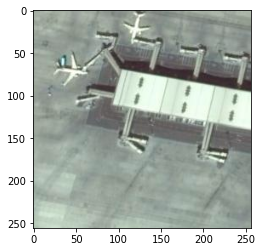

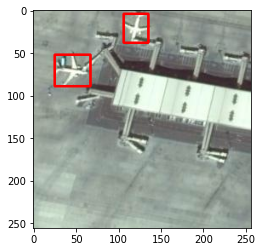

In [10]:
print("PRINTING ONE SAMPLE IMAGE AND ANNOTATION...")
for e, i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print("e = {}\nfile name = {}".format(e, filename))
        img = cv2.imread(os.path.join(path, filename))
        df = pd.read_csv(os.path.join(annot, i))
        print("annotation: '{}'".format(df))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break # This is a loop but we use break so that it only runs once.

The function `cv2.setUseOptimized()` turns on or off the optimized code in OpenCV. Some optimization can not be enabled or disabled, but, for example, most of SSE code in [OpenCV](https://opencv.org/) can be temporarily turned on or off this way.

### OpenCV

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being an Apache 2 licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

### Selective search

We need `cv2` to perform selective search on the images. To use selective search we need `opencv-contrib-python`. If needed, that can be installed with `run pip install opencv-contrib-python`.

The Selective Search algorithm implemented in OpenCV was first introduced by Uijlings et al. in their 2012 paper, [Selective Search for Object Recognition](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf).

Selective search works by over-segmenting an image using a superpixel algorithm (instead of SLIC, Uijlings et al. use the Felzenszwalb method from Felzenszwalb and Huttenlocher’s 2004 paper, [Efficient graph-based image segmentation](http://cs.brown.edu/people/pfelzens/segment/)).

[Click here](http://vision.stanford.edu/teaching/cs231b_spring1415/slides/ssearch_schuyler.pdf) for a short slide deck on selective serach written by Schuyler Smith (Stanford Computer Vision Lab) based on Uijlings et al. (2013; doi:[10.1007/s11263-013-0620-5](https://doi.org/10.1007/s11263-013-0620-5)).

In [11]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

Use image `/content/RCNN/Images/42850.jpg` as an example.

rect = 0, coordinates = 201:185:11:71
rect = 1, coordinates = 33:12:23:18
rect = 2, coordinates = 25:186:59:57
rect = 3, coordinates = 64:26:44:27
rect = 4, coordinates = 232:0:16:256
rect = 5, coordinates = 226:0:16:128
rect = 6, coordinates = 116:65:36:18
rect = 7, coordinates = 154:163:57:93
rect = 8, coordinates = 164:193:41:59
rect = 9, coordinates = 232:0:10:115
rect = 10, coordinates = 27:188:56:53
rect = 11, coordinates = 159:86:36:30
rect = 12, coordinates = 0:30:225:226
rect = 13, coordinates = 211:0:45:256
rect = 14, coordinates = 167:195:42:61
rect = 15, coordinates = 0:71:74:84
rect = 16, coordinates = 105:96:26:35
rect = 17, coordinates = 0:0:58:72
rect = 18, coordinates = 211:64:19:192
rect = 19, coordinates = 98:0:21:11
rect = 20, coordinates = 134:166:53:51
rect = 21, coordinates = 236:0:20:58
rect = 22, coordinates = 0:67:210:189
rect = 23, coordinates = 46:0:158:168
rect = 24, coordinates = 209:0:47:256
rect = 25, coordinates = 107:17:23:24
rect = 26, coordinates = 1

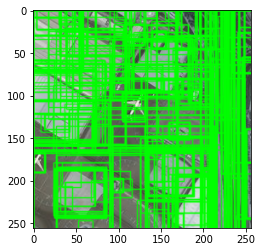

In [12]:
# Set an image path.
im = cv2.imread(os.path.join(path,"42850.jpg"))
# Set a image used by switch functions to initialize the class.
ss.setBaseImage(im)
# Initialize the class with the 'Selective search fast' parameters from Uijlings et al. (2013).
ss.switchToSelectiveSearchFast()
# Based on all images, graph segmentations and stragies, computes all possible rects and return them.
rects = ss.process()
# Copy the original image.
imOut = im.copy()
# Loop through each rect.
for i, rect in (enumerate(rects)):
    # Get coordinates.
    x, y, w, h = rect
    print("rect = {}, coordinates = {}:{}:{}:{}".format(i, x,y,w,h))
    # Append a new rect to imOut.
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# Plot a copy of the original image with all the rects.
plt.imshow(imOut)

Initialise the function to calculate IoU (Intersection over Union) of the ground truth box from the box computed by selective search. To understand more about calculating IoU you can refer to the link below.

### IoU

Intersection over Union is an evaluation metric used to measure the accuracy of an object detector on a particular dataset. You’ll typically find Intersection over Union used to evaluate the performance of HOG + Linear SVM object detectors and Convolutional Neural Network detectors (R-CNN, Faster R-CNN, YOLO, etc.); however, keep in mind that the actual algorithm used to generate the predictions doesn’t matter.

Intersection over Union is simply an evaluation metric. Any algorithm that provides predicted bounding boxes as output can be evaluated using IoU.

More formally, in order to apply Intersection over Union to evaluate an (arbitrary) object detector we need:

1. The ground-truth bounding boxes (i.e., the hand labeled bounding boxes from the testing set that specify where in the image our object is).
2. The predicted bounding boxes from our model.

As long as we have these two sets of bounding boxes we can apply Intersection over Union.

[Click here](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) to read more.

In [13]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

Re-initialise selective search.


In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

Loop through the annotations.

### Attention

Bellow, you only loop through the first 100 annotations to save RAM. This is to keep computer requirements within the limits of Google Colab using a free account.

In [14]:
!pwd
!ls
train_images=[]
train_labels=[]
print("annotations = {}".format(annot))
for e, i in enumerate(os.listdir(annot)):
    try:
      # if i.startswith("airplane"):
      if i.startswith("airplane") and e < 100:
          filename = i.split(".")[0]+".jpg"
          # print("entry {}: file {}".format(e, filename))
          image = cv2.imread(os.path.join(path, filename))
          df = pd.read_csv(os.path.join(annot, i))
          gtvalues=[]
          for row in df.iterrows():
              x1 = int(row[1][0].split(" ")[0])
              y1 = int(row[1][0].split(" ")[1])
              x2 = int(row[1][0].split(" ")[2])
              y2 = int(row[1][0].split(" ")[3])
              gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
          ss.setBaseImage(image)
          ss.switchToSelectiveSearchFast()
          ssresults = ss.process()
          imout = image.copy()
          counter = 0
          falsecounter = 0
          flag = 0
          fflag = 0
          bflag = 0
          for e, result in enumerate(ssresults):
              if e < 2000 and flag == 0:
                  for gtval in gtvalues:
                      x,y,w,h = result
                      iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                      if counter < 30:
                          if iou > 0.70:
                              timage = imout[y:y+h,x:x+w]
                              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                              train_images.append(resized)
                              train_labels.append(1)
                              counter += 1
                      else :
                          fflag =1
                      if falsecounter <30:
                          if iou < 0.3:
                              timage = imout[y:y+h,x:x+w]
                              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                              train_images.append(resized)
                              train_labels.append(0)
                              falsecounter += 1
                      else :
                          bflag = 1
                  if fflag == 1 and bflag == 1:
                      # print("inside")
                      flag = 1
      elif counter >= 350:
          break
    except Exception as e:
        print("! Error in file {} (file no. {})".format(filename, e))
        continue

/content/RCNN
Airplanes_Annotations  Images  LICENSE	parse.py  RCNN.ipynb  README.md
annotations = /content/RCNN/Airplanes_Annotations


The above code is pre-processing and creating the data-set to pass to the model. We can have 2 classes. These classes are whether the proposed region can be a foreground (i.e., airplane) or a background. We set the label of foreground (i.e., airplane) to 1 and the label of background to 0. The following steps are being performed in the above code block.

1. Loop over the image folder and set each image one by one as the base for selective search using code `ss.setBaseImage(image)`
2. Initialising fast selective search and getting proposed regions using using code `ss.switchToSelectiveSearchFast()` and `ssresults = ss.process()`
3. Iterating over all the first 2,000 results passed by selective search and calculating IoU of the proposed region and annotated region using the `get_iou()` function created above.
4. One image can have many negative samples (i.e., background) and just some positive samples (i.e., airplane). Therefore, we need to make sure that we have good proportion of both positive and negative samples to train our model. This is why we collect a maximum of 30 negative samples (i.e., background) and positive samples (i.e., airplane) from each image (see `counter` and `falsecounter` in the code block above).

After running the above code snippet our training data will be ready. The list `train_images` will contain all the images and the list `train_labels` will contain all the labels marking airplane images as 1 and non airplane images as 0.

Once you have completed the process of creating the dataset, you will convert the array to `numpy` array. This will allow you to traverse the array it easily and pass the dataset to the model in an efficient way.

In [15]:
X_new = np.array(train_images)
print("Shape of the trainning data (input): {}".format(X_new.shape))
y_new = np.array(train_labels)
print("Shape of the trainning labels (output): {}".format(y_new.shape))

Shape of the trainning data (input): (4049, 224, 224, 3)
Shape of the trainning labels (output): (4049,)


Do transfer learning on the imagenet weight by importing the VGG16 model and putting the imagenet weight in the model.

### Transfer learning

Transfer learning is the concept in deep learning in which we take an existing model which is trained on far more data and use the features that the model learned from that data and use it for our problem. To learn more about transfer learning, [click here](https://medium.com/@1297rohit/transfer-learning-from-scratch-using-keras-339834b153b9) (last accessed: Nov. 9, 2022).

In [16]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Freeze the first 15 layers of the model.

In [17]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

After that we are taking out the second last layer of the model.

In [18]:
X = vggmodel.layers[-2].output

Add a 2 unit softmax dense layer as we have just 2 classes to predict (i.e., foreground or background).

In [19]:
predictions = Dense(2, activation = "softmax")(X)

Compile the model using the [Adam optimizer](https://keras.io/api/optimizers/adam/#:~:text=Adam%20optimization%20is%20a%20stochastic,order%20and%20second%2Dorder%20moments.) with learning rate of 0.001. Use `categorical_crossentropy` as loss since the output of the model is categorical.

### Adam optimization

The Adam optimizer implements the Adam algorithm. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al. (2014) the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters."

### Categorical crossentropy

The `categorical_crossentropy` function computes the categorical crossentropy loss. This is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to quantify the difference between two probability distributions.

In [20]:
model_final = Model(vggmodel.input, predictions)

In [21]:
opt = Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

Print the the summary of the model will is printed using `model_final.summary()`.

In [23]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

One-hot encode the label using the function `MyLabelBinarizer()` and encoding the dataset.

### One-hot encode

Some machine learning algorithms (such as decision trees) can work directly with categorical data depending on implementation. However, but most algorithms require any inputs or outputs variables to be a number, or numeric in value. This means that any categorical data must be mapped to integers.

One-hot encoding (a.k.a. one-of-K scheme encoding) is a strategy to encode categorical integer features using a one-hot process. After one-hot encoding, categorical variables will be converted into a form that can be easily provided to machine learning algorithms. This facilitates prediction by those algorithms.

With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [24]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [25]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

Split the dataset using `train_test_split` from `sklearn` (use 10% of the dataset for testing  and 90% for training).

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3644, 224, 224, 3) (405, 224, 224, 3) (3644, 2) (405, 2)


In [28]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [29]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

The next step is the one that takes most computer resources so far and it may crash on Google Colab if you are using all the airplane images and annotations.

In [ ]:
# hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 4, epochs= 10, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 2.4687 - accuracy: 0.6406 
Epoch 1: val_loss improved from inf to 0.66631, saving model to ieeercnn_vgg16_1.h5
4/4 [==============================] - 136s 37s/step - loss: 2.4687 - accuracy: 0.6406 - val_loss: 0.6663 - val_accuracy: 0.7500
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.7891 
Epoch 2: val_loss improved from 0.66631 to 0.39357, saving model to ieeercnn_vgg16_1.h5
4/4 [==============================] - 131s 36s/step - loss: 0.5551 - accuracy: 0.7891 - val_loss: 0.3936 - val_accuracy: 0.8594
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.4479 - accuracy: 0.7734 
Epoch 3: val_loss did not improve from 0.39357
4/4 [==============================] - 123s 34s/step - loss: 0.4479 - accuracy: 0.7734 - val_loss: 0.4561 - val_accuracy: 0.7812
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.4338 - accuracy: 0.7969 
Epoch 4: val_loss impr

Plot the evolution of loss values over all epochs.

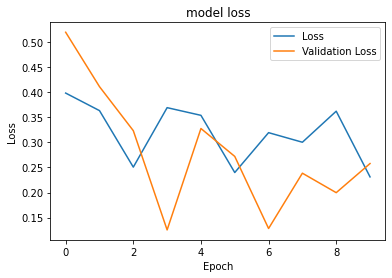

<Figure size 432x288 with 0 Axes>

In [ ]:
#plt.plot(hist.history["acc"])
#plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

Run a simple test using one data point as an example.

1/1 [==============================] - 1s 559ms/step
not plane


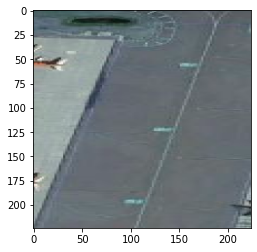

In [ ]:
# im = X_test[1600]
im = X_test[406]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

At this point we already have a model and we can use it to run predictions at will. These are the steps to follow for new predictions:

1. Pass the image from selective search.
2. Pass all the result of the selective search to the model as input using `model_final.predict(img)`.
3. **If** the output of the model says the region to be a foreground image (i.e., airplane image) **and if** the **confidence** is above the defined **threshold** then create bounding box on the original image on the coordinate of the proposed region.


1/1 [==============================] - 0s 387ms/step


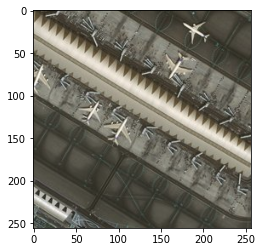

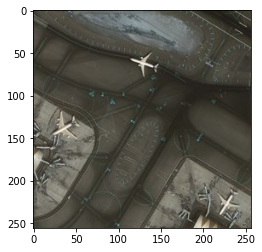

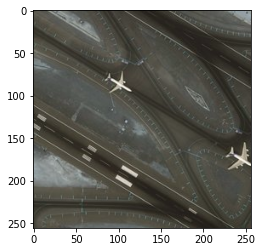

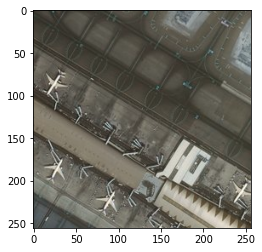

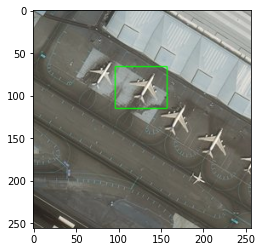

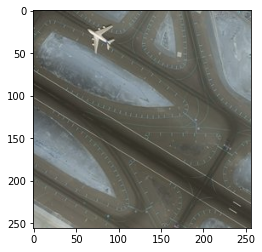

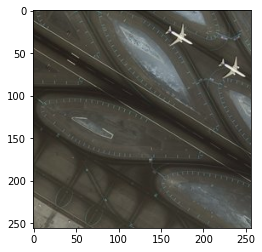

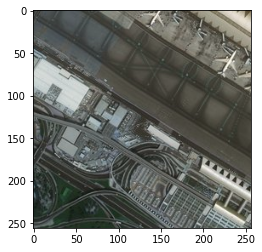

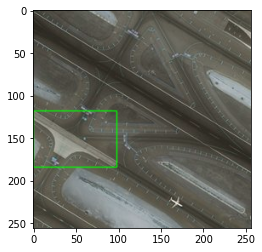

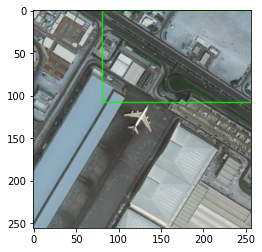

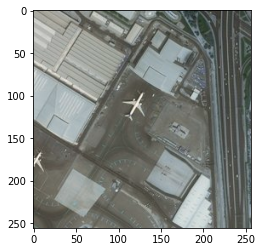

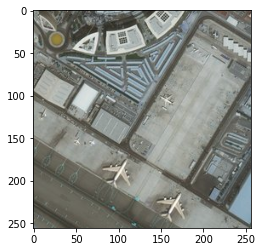

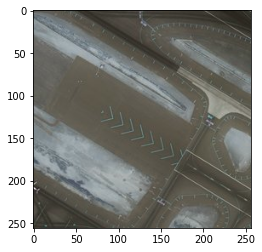

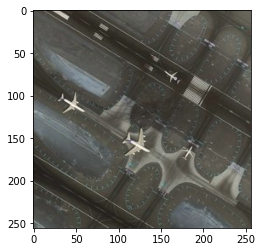

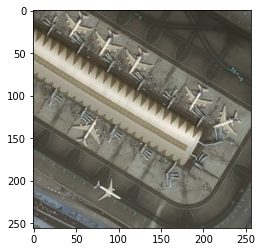

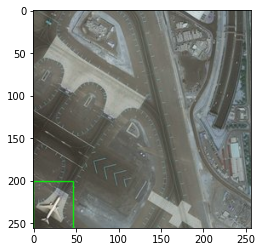

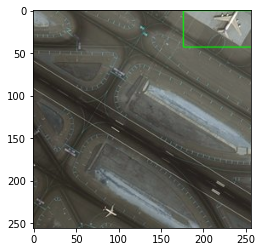

In [ ]:
for e, i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e, result in enumerate(ssresults):
            # if e < 2000:
            if e < 20:
                x, y, w, h = result
                timage = imout[y : y + h, x : x + w]
                resized = cv2.resize(timage, (224, 224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                # if out[0][0] > 0.65:
                if out[0][0] > 0.50: # We lowered the threshold here since this is just a test
                    cv2.rectangle(imout, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)
                    break
        plt.figure()
        plt.imshow(imout)